In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
# Pull in fashon mnist dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 60000 images, each 28x28 px
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_labels.shape

(60000,)

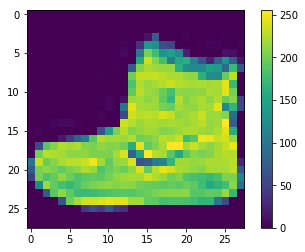

In [7]:
# images must be pre-processed
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# we need to convert the range from 0-255 to 0-1
test_images = test_images / 250.0
train_images = train_images / 250.0

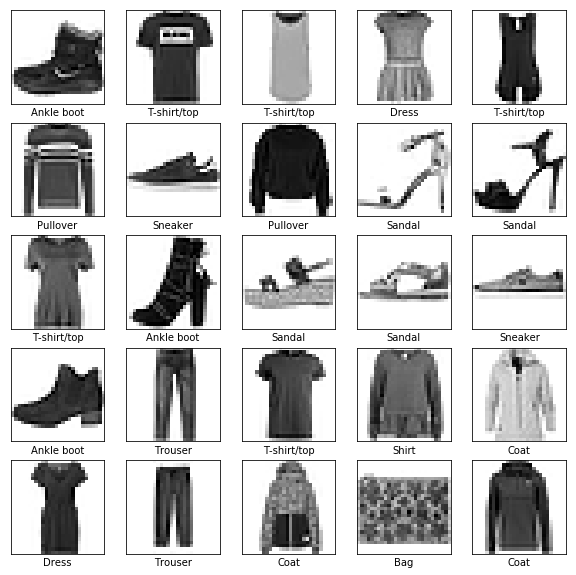

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# time to build the model
model = keras.Sequential([
    # transforms images from (28,28) format to (784,) format
    keras.layers.Flatten(input_shape=(28, 28)),
    # first layer has 128 nodes (neurons)
    keras.layers.Dense(128, activation='relu'),
    # the sencond layer has nodes which each contain a score 
    # that indicates the probability that the current image 
    # belongs to one of the 10 classes.
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4996 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3694 - accuracy: 0.8654
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3324 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3090 - accuracy: 0.8867
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2922 - accuracy: 0.8921


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3447 - accuracy: 0.8766

Test accuracy: 0.8766


In [13]:
# LETS play around with the completed model:
# predicion
predictions = model.predict(test_images)
predictions[0]

array([9.9306465e-07, 9.7566684e-09, 2.2793319e-08, 4.4147583e-10,
       6.5909225e-09, 7.8428350e-03, 4.0198714e-08, 7.3946356e-03,
       4.2885808e-06, 9.8475707e-01], dtype=float32)

In [14]:
# from the above set, we see that the model is most confident in index 9. Lets see what the label was
test_labels[0]

9

In [15]:
# lets make some helper functions to spit out fancy comparisons
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(# predicted label
                                         class_names[predicted_label], 
                                         # bias toward that prediction
                                         100*np.max(predictions_array),
                                         # actual label
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

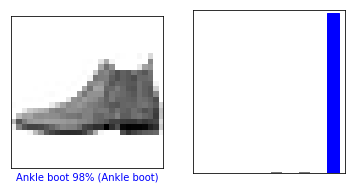

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

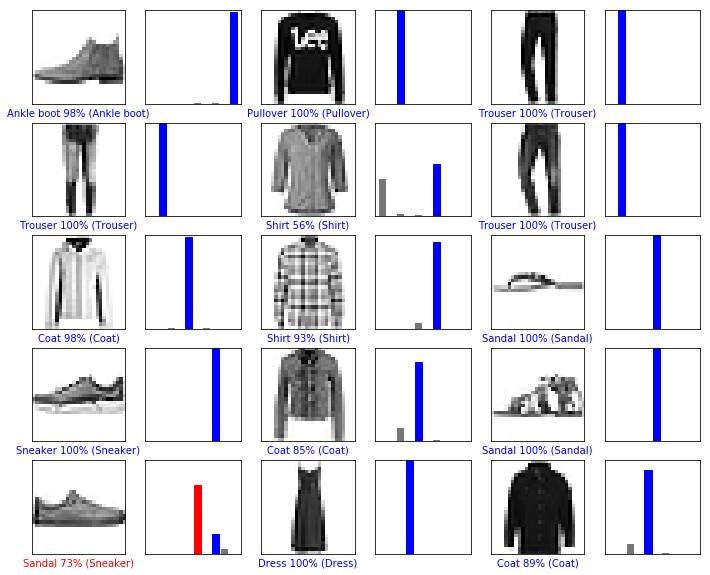

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [18]:
# Finally, use the trained model to make a prediction about a single image.
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image:
predictions_single = model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
[[9.9305987e-07 9.7566319e-09 2.2793188e-08 4.4147502e-10 6.5908972e-09
  7.8428239e-03 4.0198639e-08 7.3946286e-03 4.2885727e-06 9.8475707e-01]]


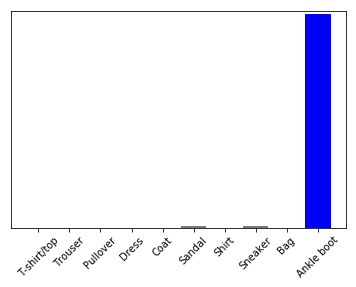

In [19]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [20]:
# model.predict returns a list of lists—one list for each image 
# in the batch of data. Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

9